1. 데이터 로드 및 단어 토큰화 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

import nltk 
import torch 
import urllib.request 
 
from tqdm import tqdm 
from collections import Counter 
from nltk.tokenize import word_tokenize 
from sklearn.model_selection import train_test_split

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SBAUser\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
df = pd.read_csv('./IMDB Dataset.csv')

In [4]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

In [5]:
df.isna().values.any()

False

In [6]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

<Axes: >

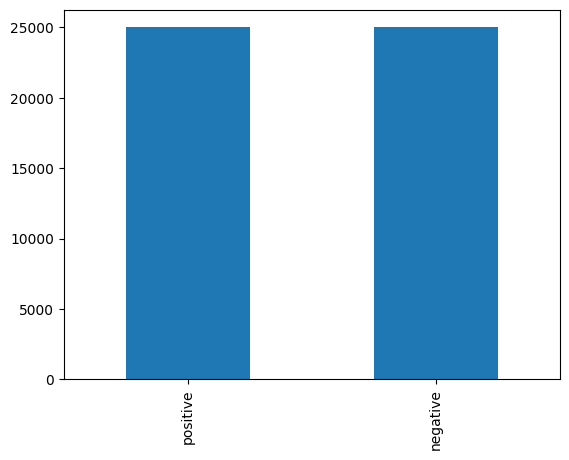

In [7]:
df['sentiment'].value_counts().plot(kind='bar')

In [8]:
print('레이블개수')
print(df.groupby('sentiment').size())
print()
print(df.groupby('sentiment').size().reset_index(name='count'))

# positive = 1 negative = 0로 반환 

레이블개수
sentiment
negative    25000
positive    25000
dtype: int64

  sentiment  count
0  negative  25000
1  positive  25000


In [9]:
# positive: 1 

df['sentiment'] = df['sentiment'].replace(['positive','negative'], [1,0])

In [10]:
df.head(3)

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1


In [11]:
df.head(3)

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1


In [12]:
df.columns

Index(['review', 'sentiment'], dtype='object')

In [13]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [14]:
x_data = df['review']
y_data = df['sentiment']

print('영화 리뷰 개수:{}'.format(len(x_data)))
print('레이블 개수:{}'.format(len(y_data)))

영화 리뷰 개수:50000
레이블 개수:50000


In [15]:
# 훈련용 과 테스트용으로 데이터를 구분 

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42, stratify=y_data)

In [16]:
# 훈련용 데이터를 다시 훈련용과 검증용으로 나눈다 8:2 

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [17]:
y_train.value_counts()[0]

16000

In [18]:
print('훈련 데이터 비율')
print(f'부정 리뷰={round(y_train.value_counts()[0] / len(y_train)*100, 3)}%')
print()
print(f'긍정 리뷰={round(y_train.value_counts()[1] / len(y_train)*100, 3)}%')
print()
print()
print('검증 데이터 비율')
print(f'부정 리뷰={round(y_valid.value_counts()[0] / len(y_valid)*100, 3)}%')
print()
print(f'긍정 리뷰={round(y_valid.value_counts()[1] / len(y_valid)*100, 3)}%')
print()
print()
print('테스트 데이터 비율')
print(f'부정 리뷰={round(y_test.value_counts()[0] / len(y_test)*100, 3)}%')
print()
print(f'긍정 리뷰={round(y_test.value_counts()[1] / len(y_test)*100, 3)}%')

훈련 데이터 비율
부정 리뷰=50.0%

긍정 리뷰=50.0%


검증 데이터 비율
부정 리뷰=50.0%

긍정 리뷰=50.0%


테스트 데이터 비율
부정 리뷰=50.0%

긍정 리뷰=50.0%


In [19]:
def tokenize(sentences):
    tokenized_sentences = []
    for sent in tqdm(sentences):
        tokenized_sent = word_tokenize(sent)
        tokenized_sent = [word.lower() for word in tokenized_sent]
        tokenized_sentences.append(tokenized_sent)
    return tokenized_sentences

In [20]:
x_train.head()

26680    Oh yes, I have to agree with the others who de...
16648    The basic hook here is: Lincoln Is Slow. It is...
29967    Just utter trash. I'm a huge fan of the Cusack...
34122    Meet Cosmo (Jason Priestley), a nerdy young bo...
823      I don't know why some people criticise that sh...
Name: review, dtype: object

In [21]:
tokenize(x_train.head())

100%|██████████| 5/5 [00:00<00:00, 625.27it/s]


[['oh',
  'yes',
  ',',
  'i',
  'have',
  'to',
  'agree',
  'with',
  'the',
  'others',
  'who',
  'describe',
  'this',
  'as',
  'appalling',
  '.',
  'the',
  'acting',
  'in',
  'this',
  'four',
  'hour',
  'feature',
  'is',
  'uniformly',
  'bad',
  ',',
  'so',
  'bad',
  'to',
  'the',
  'point',
  'that',
  'i',
  'find',
  'it',
  'impossible',
  'to',
  'believe',
  'any',
  'of',
  'the',
  'actors',
  'in',
  'this',
  'production',
  'could',
  'possibly',
  'earn',
  'a',
  'living',
  'as',
  'an',
  'actor',
  '.',
  'i',
  'still',
  'wonder',
  'who',
  'did',
  'the',
  'casting',
  '.',
  'each',
  'delivers',
  'their',
  'lines',
  'without',
  'appearing',
  'to',
  'have',
  'any',
  'kind',
  'of',
  'engagement',
  'or',
  'emotional',
  'investment',
  'with',
  'any',
  'other',
  'character',
  '.',
  'none',
  'appear',
  'to',
  'have',
  'a',
  'true',
  'relationship',
  ',',
  'family',
  'or',
  'otherwise',
  ',',
  'with',
  'another',
  '.',
 

In [22]:
tokenized_x_train = tokenize(x_train)
tokenized_x_valid = tokenize(x_valid)
tokenized_x_test = tokenize(x_test)

100%|██████████| 10000/10000 [00:06<00:00, 1436.50it/s]


In [23]:
# 상위 샘플 2개 출력 

for sent in tokenized_x_train[:2]:
    print(sent)

['oh', 'yes', ',', 'i', 'have', 'to', 'agree', 'with', 'the', 'others', 'who', 'describe', 'this', 'as', 'appalling', '.', 'the', 'acting', 'in', 'this', 'four', 'hour', 'feature', 'is', 'uniformly', 'bad', ',', 'so', 'bad', 'to', 'the', 'point', 'that', 'i', 'find', 'it', 'impossible', 'to', 'believe', 'any', 'of', 'the', 'actors', 'in', 'this', 'production', 'could', 'possibly', 'earn', 'a', 'living', 'as', 'an', 'actor', '.', 'i', 'still', 'wonder', 'who', 'did', 'the', 'casting', '.', 'each', 'delivers', 'their', 'lines', 'without', 'appearing', 'to', 'have', 'any', 'kind', 'of', 'engagement', 'or', 'emotional', 'investment', 'with', 'any', 'other', 'character', '.', 'none', 'appear', 'to', 'have', 'a', 'true', 'relationship', ',', 'family', 'or', 'otherwise', ',', 'with', 'another', '.', 'the', 'direction', 'is', 'also', 'appalling', 'and', 'any', 'action', 'scene', 'is', 'laughable', 'and', 'unconvincing', '.', 'were', 'the', 'film', 'editors', 'asleep', '?', '<', 'br', '/', '>',

vocab 맹글기 (단어집합 생성.)

In [24]:
# Counter()함수 사용 
# -> 각 단어별 빈도수 

word_list = []

for sent in tokenized_x_train:
    for word in sent:
        word_list.append(word)

In [25]:
word_list[0]

'oh'

In [26]:
word_counts=Counter(word_list)

print('총 단어수:', len(word_counts))

총 단어수: 128719


In [27]:
word_counts['the']

424785

In [28]:
# word_counts 정렬, 등장빈도 상위 10개 출력 

vocab = sorted(word_counts, key=word_counts.get, reverse=True)
print('등장빈도수 상위 10개 단어')
print(vocab[:10])

등장빈도수 상위 10개 단어
['the', ',', '.', 'and', 'a', 'of', 'to', 'is', '/', '>']


In [29]:
# 등장 빈도수가 3회미만인 단어들의 비중(비율) 확인 

threshold = 3 

total_cnt = len(word_counts) # eksdjtn 
rare_cnt = 0        # 등장빈도ㅜ수가 threshold보다 작은 단어의 개수를 세기 
total_freq = 0      # 훈련데이터 전체 단어 빈도수의 총합 
rare_freq = 0       # 등장빈도수가 threshold보다 작은 단어 등장빈도수의 총합 

# 단어, 빈도수 pair(쌍) -> key, value

for key, value in word_counts.items():
    total_freq = total_freq + value
    
    # 단어  등장빈도수가 threshold보다 작으면 
    if (value < threshold):
        rare_cnt =rare_cnt + 1
        rare_freq = rare_freq + value

In [30]:
print('단어 집합(vocab)의 크기:', total_cnt)
print('등장 빈도수 %s 번 이하의 희귀 단어수:%s'%(threshold - 1, rare_cnt))
print('단어집합에서 희귀 단어비율:', (rare_cnt / total_cnt)*100)
print('전체 등장빈도에서 희귀단어의 등장비율:', (rare_freq / total_freq)*100)

단어 집합(vocab)의 크기: 128719
등장 빈도수 2 번 이하의 희귀 단어수:80067
단어집합에서 희귀 단어비율: 62.202938183174204
전체 등장빈도에서 희귀단어의 등장비율: 1.064486445568323


In [31]:
# 등장 빈도수 2회이하의 단어를 제외하자. 

vocab_size = total_cnt - rare_cnt 
print(vocab_size)   # 38179

vocab = vocab[:vocab_size]
print('단어집합의 크기', len(vocab))

48652
단어집합의 크기 48652


In [32]:
vocab[:10]

['the', ',', '.', 'and', 'a', 'of', 'to', 'is', '/', '>']

In [33]:
word_to_index = {}
word_to_index['<PAD>'] = 0
word_to_index['<UNK>'] = 1

In [34]:
for index, word in enumerate(vocab):
    word_to_index[word] = index+2

In [35]:
word_to_index

{'<PAD>': 0,
 '<UNK>': 1,
 'the': 2,
 ',': 3,
 '.': 4,
 'and': 5,
 'a': 6,
 'of': 7,
 'to': 8,
 'is': 9,
 '/': 10,
 '>': 11,
 '<': 12,
 'br': 13,
 'it': 14,
 'in': 15,
 'i': 16,
 'this': 17,
 'that': 18,
 "'s": 19,
 'was': 20,
 'as': 21,
 'with': 22,
 'for': 23,
 'movie': 24,
 'but': 25,
 'film': 26,
 ')': 27,
 '(': 28,
 'you': 29,
 'on': 30,
 "n't": 31,
 "''": 32,
 '``': 33,
 'not': 34,
 'are': 35,
 'he': 36,
 'his': 37,
 'have': 38,
 'be': 39,
 'one': 40,
 '!': 41,
 'at': 42,
 'all': 43,
 'they': 44,
 'by': 45,
 'an': 46,
 'who': 47,
 'from': 48,
 'so': 49,
 'like': 50,
 'there': 51,
 'or': 52,
 'do': 53,
 'just': 54,
 'her': 55,
 'if': 56,
 'about': 57,
 'has': 58,
 'out': 59,
 '?': 60,
 'what': 61,
 'some': 62,
 'good': 63,
 'when': 64,
 'more': 65,
 'very': 66,
 'she': 67,
 'would': 68,
 'even': 69,
 'my': 70,
 'no': 71,
 'up': 72,
 'can': 73,
 'which': 74,
 'time': 75,
 'really': 76,
 'only': 77,
 'see': 78,
 'had': 79,
 'their': 80,
 'story': 81,
 'were': 82,
 'did': 83,
 'me': 

In [36]:
vocab_size = len(word_to_index)
vocab_size # padding token, UNK token이 더해졌다

48654

In [37]:
word_to_index['<PAD>']

0

정수인코딩

In [38]:
def texts_to_sequence(tokenized_x_data, word_to_index):
    encoded_x_data = []
    for sent in tokenized_x_data:
        index_sequences = []
        for word in sent: 
            try: 
                index_sequences.append(word_to_index[word])
            except KeyError:
                index_sequences.append(word_to_index['<UNK>'])
        encoded_x_data.append(index_sequences)
    return encoded_x_data

In [39]:
print(tokenized_x_train[:10])

[['oh', 'yes', ',', 'i', 'have', 'to', 'agree', 'with', 'the', 'others', 'who', 'describe', 'this', 'as', 'appalling', '.', 'the', 'acting', 'in', 'this', 'four', 'hour', 'feature', 'is', 'uniformly', 'bad', ',', 'so', 'bad', 'to', 'the', 'point', 'that', 'i', 'find', 'it', 'impossible', 'to', 'believe', 'any', 'of', 'the', 'actors', 'in', 'this', 'production', 'could', 'possibly', 'earn', 'a', 'living', 'as', 'an', 'actor', '.', 'i', 'still', 'wonder', 'who', 'did', 'the', 'casting', '.', 'each', 'delivers', 'their', 'lines', 'without', 'appearing', 'to', 'have', 'any', 'kind', 'of', 'engagement', 'or', 'emotional', 'investment', 'with', 'any', 'other', 'character', '.', 'none', 'appear', 'to', 'have', 'a', 'true', 'relationship', ',', 'family', 'or', 'otherwise', ',', 'with', 'another', '.', 'the', 'direction', 'is', 'also', 'appalling', 'and', 'any', 'action', 'scene', 'is', 'laughable', 'and', 'unconvincing', '.', 'were', 'the', 'film', 'editors', 'asleep', '?', '<', 'br', '/', '>'

In [40]:
encoded_x_train = texts_to_sequence(tokenized_x_train, word_to_index)
print()

In [41]:
encoded_x_train = texts_to_sequence(tokenized_x_train, word_to_index)
encoded_x_valid = texts_to_sequence(tokenized_x_valid, word_to_index)
encoded_x_test = texts_to_sequence(tokenized_x_test, word_to_index)

In [42]:
# 상위 샘플 2개 출력 

for sent in encoded_x_train[:2]:
    print(sent)

[441, 438, 3, 16, 38, 8, 1007, 22, 2, 412, 47, 1660, 17, 21, 3471, 4, 2, 132, 15, 17, 694, 576, 809, 9, 5873, 99, 3, 49, 99, 8, 2, 241, 18, 16, 177, 14, 1163, 8, 272, 116, 7, 2, 169, 15, 17, 377, 94, 898, 5729, 6, 588, 21, 46, 303, 4, 16, 144, 561, 47, 83, 2, 1047, 4, 264, 1510, 80, 420, 219, 3187, 8, 38, 116, 253, 7, 8669, 52, 882, 8437, 22, 116, 95, 122, 4, 628, 950, 8, 38, 6, 309, 640, 3, 251, 52, 899, 3, 22, 172, 4, 2, 487, 9, 98, 3471, 5, 116, 235, 149, 9, 1418, 5, 2789, 4, 82, 2, 26, 12263, 2316, 60, 12, 13, 10, 11, 12, 13, 10, 11, 2, 1315, 950, 2923, 8, 2, 22616, 816, 25, 2, 40943, 180, 3135, 1131, 5, 2658, 28, 266, 2, 1267, 2658, 41, 27, 35, 5820, 5, 16, 53, 31, 272, 82, 1249, 15, 409, 5269, 1131, 9238, 539, 388, 15, 11496, 4, 12, 13, 10, 11, 12, 13, 10, 11, 98, 2, 1161, 91, 2, 355, 38, 590, 3457, 19541, 3, 5, 2, 375, 38, 33, 214, 1161, 32, 152, 1, 2, 269, 395, 1701, 1, 12, 13, 10, 11, 12, 13, 10, 11, 43, 2, 672, 121, 3, 201, 5, 188, 3, 35, 193, 1327, 25, 17, 86, 31, 113, 72, 2

In [43]:
index_to_word= {}

for key, value in word_to_index.items():
    index_to_word[value]=key

In [44]:
print(encoded_x_train[0])

[441, 438, 3, 16, 38, 8, 1007, 22, 2, 412, 47, 1660, 17, 21, 3471, 4, 2, 132, 15, 17, 694, 576, 809, 9, 5873, 99, 3, 49, 99, 8, 2, 241, 18, 16, 177, 14, 1163, 8, 272, 116, 7, 2, 169, 15, 17, 377, 94, 898, 5729, 6, 588, 21, 46, 303, 4, 16, 144, 561, 47, 83, 2, 1047, 4, 264, 1510, 80, 420, 219, 3187, 8, 38, 116, 253, 7, 8669, 52, 882, 8437, 22, 116, 95, 122, 4, 628, 950, 8, 38, 6, 309, 640, 3, 251, 52, 899, 3, 22, 172, 4, 2, 487, 9, 98, 3471, 5, 116, 235, 149, 9, 1418, 5, 2789, 4, 82, 2, 26, 12263, 2316, 60, 12, 13, 10, 11, 12, 13, 10, 11, 2, 1315, 950, 2923, 8, 2, 22616, 816, 25, 2, 40943, 180, 3135, 1131, 5, 2658, 28, 266, 2, 1267, 2658, 41, 27, 35, 5820, 5, 16, 53, 31, 272, 82, 1249, 15, 409, 5269, 1131, 9238, 539, 388, 15, 11496, 4, 12, 13, 10, 11, 12, 13, 10, 11, 98, 2, 1161, 91, 2, 355, 38, 590, 3457, 19541, 3, 5, 2, 375, 38, 33, 214, 1161, 32, 152, 1, 2, 269, 395, 1701, 1, 12, 13, 10, 11, 12, 13, 10, 11, 43, 2, 672, 121, 3, 201, 5, 188, 3, 35, 193, 1327, 25, 17, 86, 31, 113, 72, 2

In [45]:
print([index_to_word[word] for word in encoded_x_train[0]])

['oh', 'yes', ',', 'i', 'have', 'to', 'agree', 'with', 'the', 'others', 'who', 'describe', 'this', 'as', 'appalling', '.', 'the', 'acting', 'in', 'this', 'four', 'hour', 'feature', 'is', 'uniformly', 'bad', ',', 'so', 'bad', 'to', 'the', 'point', 'that', 'i', 'find', 'it', 'impossible', 'to', 'believe', 'any', 'of', 'the', 'actors', 'in', 'this', 'production', 'could', 'possibly', 'earn', 'a', 'living', 'as', 'an', 'actor', '.', 'i', 'still', 'wonder', 'who', 'did', 'the', 'casting', '.', 'each', 'delivers', 'their', 'lines', 'without', 'appearing', 'to', 'have', 'any', 'kind', 'of', 'engagement', 'or', 'emotional', 'investment', 'with', 'any', 'other', 'character', '.', 'none', 'appear', 'to', 'have', 'a', 'true', 'relationship', ',', 'family', 'or', 'otherwise', ',', 'with', 'another', '.', 'the', 'direction', 'is', 'also', 'appalling', 'and', 'any', 'action', 'scene', 'is', 'laughable', 'and', 'unconvincing', '.', 'were', 'the', 'film', 'editors', 'asleep', '?', '<', 'br', '/', '>',

In [46]:
decoded_sample = [index_to_word[word] for word in encoded_x_train[0]]

In [47]:
print('기존의 첫번째  샘플:', tokenized_x_train[0])
print('복원된 첫번째  샘플:', decoded_sample[0])

기존의 첫번째  샘플: ['oh', 'yes', ',', 'i', 'have', 'to', 'agree', 'with', 'the', 'others', 'who', 'describe', 'this', 'as', 'appalling', '.', 'the', 'acting', 'in', 'this', 'four', 'hour', 'feature', 'is', 'uniformly', 'bad', ',', 'so', 'bad', 'to', 'the', 'point', 'that', 'i', 'find', 'it', 'impossible', 'to', 'believe', 'any', 'of', 'the', 'actors', 'in', 'this', 'production', 'could', 'possibly', 'earn', 'a', 'living', 'as', 'an', 'actor', '.', 'i', 'still', 'wonder', 'who', 'did', 'the', 'casting', '.', 'each', 'delivers', 'their', 'lines', 'without', 'appearing', 'to', 'have', 'any', 'kind', 'of', 'engagement', 'or', 'emotional', 'investment', 'with', 'any', 'other', 'character', '.', 'none', 'appear', 'to', 'have', 'a', 'true', 'relationship', ',', 'family', 'or', 'otherwise', ',', 'with', 'another', '.', 'the', 'direction', 'is', 'also', 'appalling', 'and', 'any', 'action', 'scene', 'is', 'laughable', 'and', 'unconvincing', '.', 'were', 'the', 'film', 'editors', 'asleep', '?', '<', 'b

패딩(padding)

In [48]:
#print('리뷰의 최대길이:', max(len(review) for review))

In [49]:
# 전체 샘플중 길이가 max_len 이하의 샘플 비율을 확인하는 함수를 생성합니다 

def below_threshold_len(max_len, nested_list):
    count=0
    for sentence in nested_list:
        if (len(sentence) <= max_len):
            count = count+1 
    print('전체 샘플 중 길이가 %s 이하인 샘플 비율:%s'%(max_len,(count/len(nested_list))*100))

In [50]:
max_len = 500 

below_threshold_len(max_len, encoded_x_train)

전체 샘플 중 길이가 500 이하인 샘플 비율:87.753125


In [51]:
len(encoded_x_train)

32000

In [52]:
np.zeros((len(encoded_x_train), max_len))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [53]:
print((np.zeros((len(encoded_x_train), max_len))))
print((np.zeros((len(encoded_x_train), max_len))).shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(32000, 500)


In [54]:
def pad_sequences(sentences, max_len):
    features = np.zeros((len(sentences), max_len), dtype=int)
    for index, sentence in enumerate(sentences):
        if len(sentence) != 0:
            features[index, :len(sentence)] = np.array(sentence)[:max_len]
    return features

In [55]:
padded_x_train = pad_sequences(encoded_x_train, max_len=max_len)
padded_x_valid = pad_sequences(encoded_x_valid, max_len=max_len)
padded_x_test = pad_sequences(encoded_x_test, max_len=max_len)

In [56]:
print('훈련 데이터 크기:', padded_x_train.shape)
print('검증 데이터 크기:', padded_x_valid.shape)
print('테스트 데이터 크기:', padded_x_test.shape)

훈련 데이터 크기: (32000, 500)
검증 데이터 크기: (8000, 500)
테스트 데이터 크기: (10000, 500)


In [57]:
# 첫번쨰 샘플 길이 

print(len(padded_x_train[0]))

# 첫번쨰 샘플 

print(padded_x_train[0])

500
[  441   438     3    16    38     8  1007    22     2   412    47  1660
    17    21  3471     4     2   132    15    17   694   576   809     9
  5873    99     3    49    99     8     2   241    18    16   177    14
  1163     8   272   116     7     2   169    15    17   377    94   898
  5729     6   588    21    46   303     4    16   144   561    47    83
     2  1047     4   264  1510    80   420   219  3187     8    38   116
   253     7  8669    52   882  8437    22   116    95   122     4   628
   950     8    38     6   309   640     3   251    52   899     3    22
   172     4     2   487     9    98  3471     5   116   235   149     9
  1418     5  2789     4    82     2    26 12263  2316    60    12    13
    10    11    12    13    10    11     2  1315   950  2923     8     2
 22616   816    25     2 40943   180  3135  1131     5  2658    28   266
     2  1267  2658    41    27    35  5820     5    16    53    31   272
    82  1249    15   409  5269  1131  9238   53

모델링

In [58]:
import torch

In [59]:
import torch.nn as nn 
import torch.nn.functional as F

In [60]:
train_label_tensor = torch.tensor(np.array(y_train))
valid_label_tensor = torch.tensor(np.array(y_valid))
test_label_tensor = torch.tensor(np.array(y_test))

In [61]:
train_label_tensor[:5]

tensor([0, 1, 0, 0, 1])

In [62]:
USE_CUDA = torch.cuda.is_available()
device = torch.device('cuda' if USE_CUDA else 'cpu')

In [63]:
class TextClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(TextClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.gru = nn.GRU(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        
    def forward(self,x):
        #x: (batch_size, seq_length)
        # 입력크기는 (배치크기, 문장길이)
        embedded = self.embedding(x)
        # 임베딩된 벡터 값(숫자)으로 변환
        # (batch_size, seq_length, embedding_dim)
        # 배치크기 / 문장길이 / 임베딩 벡터차원.
        
        # 마지막 시점의 은닉상태(hidden state)값과 출력층을 연결. 
        # 즉, 모든 시점(문장길이) 존재 안함, 단 하나만 존재 
        gru_out, hidden = self.gru(embedded)
        # gru_out: (batch_size, seq_length, hidden_dim)
        # hidden_dim: (1, batch_size, hidden_dim)
        last_hidden = hidden.squeeze(0)
        # (batch_size, hidden_dim)
        logits = self.fc(last_hidden)
        # (batch_size, output_dim)
        # 배치크기 , 분류하고자 하는 카테고리 수 
        return logits

In [64]:
# 각 데이터를 배치단위로 데이터묶음을 꺼내주는 데이터 로더에 전달한다. 

encoded_train = torch.tensor(padded_x_train).to(torch.int64)
train_dataset = torch.utils.data.TensorDataset(encoded_train, train_label_tensor)
train_dataloader= torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=32)

encoded_test = torch.tensor(padded_x_test).to(torch.int64)
test_dataset = torch.utils.data.TensorDataset(encoded_test, test_label_tensor)
test_dataloader= torch.utils.data.DataLoader(test_dataset, shuffle=True, batch_size=32)

encoded_valid = torch.tensor(padded_x_valid).to(torch.int64)
valid_dataset = torch.utils.data.TensorDataset(encoded_valid, valid_label_tensor)
val_dataloader= torch.utils.data.DataLoader(valid_dataset, shuffle=True, batch_size=32)


torch.tensor(padded_x_test)

tensor([[ 438,    3, 4589,  ...,    0,    0,    0],
        [   2,   81,    7,  ...,    0,    0,    0],
        [   6,  702, 6907,  ...,    0,    0,    0],
        ...,
        [  17,    9,    2,  ...,    0,    0,    0],
        [  17,    9,    6,  ...,    0,    0,    0],
        [5708, 6973, 5931,  ...,    0,    0,    0]], dtype=torch.int32)

In [65]:
print(len(encoded_x_train))
print(len(encoded_x_train) / 32)

# 훈련 데이터 샘플 개수: 20000
# 배치사이즈 32이면 625. -> 32개씩 묶인 데이터묶음이 625개있다. 

32000
1000.0


In [66]:
num_epochs = 5
total_batch = len(train_dataloader)
print('총 배치 수:{}'.format(total_batch))

총 배치 수:1000


In [67]:
embedding_dim = 100         # 임베딩 벡터차원을 100으로설정 
hidden_dim = 128 # 은닉상태의 차원 128로 설정 
output_dim = 2  # 출력층크기 ( 분류해야할 카테고리 개수 _ 이진화 범주)
learning_rate = 0.01    
num_epochs = 10 

In [68]:
model = TextClassifier(vocab_size, embedding_dim, hidden_dim, output_dim)
model.to(device)        # gpu쓰겟따

# 얘가 모델.summary와 같은 기능을 보여줍니다. 

TextClassifier(
  (embedding): Embedding(48654, 100)
  (gru): GRU(100, 128, batch_first=True)
  (fc): Linear(in_features=128, out_features=2, bias=True)
)

In [69]:
# 손실함수, 최적화 함수를 설정 
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [70]:
def calculate_accuracy(logits, labels):
    predicted = torch.argmax(logits, dim=1)
    # dim = 1 : 두번째 차원(행)을 따라 최대값을 찾기 
    correct = (predicted == labels).sum().item()
    total = labels.size(0)
    # labels의 첫번째 차원의 크기 반환 
    accuracy = correct/total
    return accuracy

In [71]:
def evaluate(model, valid_dataloader, criterion, device) :
    val_loss = 0
    val_correct = 0
    val_total = 0
    
    # model.eval()
    # 모델 평가 모드 설정
    # 모델 내부 모든 layer에 대해서 평가모드 활성화 됨
    model.eval()
    
    # with torch.nograd()
    # 자동 미분 엔진에서 gradient 계산 비활성화함
    # 평가 중에는 기울기 계산할 필요가 없음 >> 메모리 절약, 속도가 빨라짐
    with torch.no_grad() :
        # 데이터로더로부터 배치 크기만큼 데이터를 연속으로 load
        for batch_x, batch_y in valid_dataloader :
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)
            
            # 모델의 예측값
            logits = model(batch_x)
            
            # 손실 계산
            loss = criterion(logits, batch_y)
            
            # 정확도와 손실 계산
            val_loss += loss.item()
            
            # 검증 데이터셋에서 모델이 정확하게 예측한 샘플 수 계산하는 코드
            val_correct += calculate_accuracy(logits, batch_y) * batch_y.size(0)
            # batch_y.size(0) : batch 내 샘플 수
            
            # 이전에 계산한 검증 데이터 셋에 정확히 예측한 샘플 수 더함
            val_total += batch_y.size(0)
            
    
    val_accuracy = val_correct / val_total
    val_loss /= len(valid_dataloader)
    
    return val_loss, val_accuracy

# Training Loop

best_val_loss = float('inf')

for epoch in range(num_epochs) :
    # training
    train_loss = 0
    train_correct = 0
    train_total = 0
    model.train()
    
    for batch_x, batch_y in train_dataloader :
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)
        
        logits = model(batch_x)
        loss = criterion(logits, batch_y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        train_correct += calculate_accuracy(logits, batch_y) * batch_y.size(0)
        train_total += batch_y.size(0)
    
    train_accuracy = train_correct / train_total
    train_loss /= len(train_dataloader)
    
    # validation
    val_loss, val_accuracy = evaluate(model, val_dataloader, criterion, device)
    
    print(f'Epoch : {epoch+1}/{num_epochs} \t Train Loss : {train_loss:.4f} \t Train Accuracy : {train_accuracy:.4f} \t Val Loss : {val_loss:.4f} \t Val Accuracy : {val_accuracy:.4f}')
    
    if val_loss < best_val_loss :
        print(f'Validation loss improved from {best_val_loss:.4f} to {val_loss:.4f}. model save')
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'best_model_checkpoint.pth')
        
    

Epoch : 1/10 	 Train Loss : 0.6967 	 Train Accuracy : 0.5023 	 Val Loss : 0.6993 	 Val Accuracy : 0.5080
Validation loss improved from inf to 0.6993. model save
Epoch : 2/10 	 Train Loss : 0.6911 	 Train Accuracy : 0.5191 	 Val Loss : 0.6926 	 Val Accuracy : 0.5052
Validation loss improved from 0.6993 to 0.6926. model save
Epoch : 3/10 	 Train Loss : 0.6739 	 Train Accuracy : 0.5532 	 Val Loss : 0.6599 	 Val Accuracy : 0.6082
Validation loss improved from 0.6926 to 0.6599. model save
Epoch : 4/10 	 Train Loss : 0.4550 	 Train Accuracy : 0.7854 	 Val Loss : 0.3903 	 Val Accuracy : 0.8427
Validation loss improved from 0.6599 to 0.3903. model save
Epoch : 5/10 	 Train Loss : 0.2332 	 Train Accuracy : 0.9105 	 Val Loss : 0.3073 	 Val Accuracy : 0.8731
Validation loss improved from 0.3903 to 0.3073. model save
Epoch : 6/10 	 Train Loss : 0.1391 	 Train Accuracy : 0.9518 	 Val Loss : 0.3059 	 Val Accuracy : 0.8918
Validation loss improved from 0.3073 to 0.3059. model save
Epoch : 7/10 	 Trai

In [72]:
# 모델 로드 및 평가 

model.load_state_dict(torch.load('best_model_checkpoint.pth'))

model.to(device)

# 검증 데이터에 대한 정확도, 손실 계산
val_loss, val_accuracy = evaluate(model, val_dataloader, criterion, device)

In [78]:
print(f'Best model validation loss : {val_loss:.4f}')
print(f'Best model validation accuracy : {val_accuracy:.4f}')

Best model validation loss : 0.3059
Best model validation accuracy : 0.8918


In [75]:
# 테스트 데이터에 대한 정확도와 손실 계산
test_loss, test_accuracy = evaluate(model, test_dataloader, criterion, device)

In [77]:
print(f'Best model test loss : {test_loss:.4f}')
print(f'Best model test accuracy : {test_accuracy:.4f}')

Best model test loss : 0.3140
Best model test accuracy : 0.8894


In [79]:
# Inference(테스트)

index_to_tag = {0 : '부정', 1 :'긍정'}

In [89]:
def predict(text, model, word_to_index, index_to_tag) :
    model.eval()
    # 입력된 텍스트 >> 토큰화
    tokens = word_tokenize(text)
    token_indices = [word_to_index.get(token.lower(),1) for token in tokens ]
    
    # token >> tensor 변환
    input_tensor = torch.tensor([token_indices], dtype=torch.long).to(device)
    
    # input tensor >> 모델에 적용
    with torch.no_grad() :
        logits = model(input_tensor)
        #(1, output_dim)
    
    # 예측된 클래스(class) (0, 1)형태 반환
    predicted_index = torch.argmax(logits, dim=1)
    
    # predicted_index >> 상응하는 tag인 (0,1) 로 변환
    predicted_tag = index_to_tag[predicted_index.item()]
    
    return predicted_tag

In [90]:
text_input = \
'''
Cause I-I-I'm in the stars tonight
So watch me bring the fire and set the night alight
Shoes on, get up in the morn'
Cup of milk, let's rock and roll
King Kong, kick the drum, rolling on like a Rolling Stone
Sing song when I'm walking home
Jump up to the top, LeBron
Ding dong, call me on my phone
Ice tea and a game of ping pong, huh
This is getting heavy
Can you hear the bass boom? I'm ready (woo hoo)
Life is sweet as honey
Yeah, this beat cha-ching like money, huh
Disco overload, I'm into that, I'm good to go
I'm diamond, you know I glow up
Hey, so let's go
'Cause I-I-I'm in the stars tonight
So watch me bring the fire and set the night alight (hey)
Shining through the city with a little funk and soul
So I'ma light it up like dynamite, whoa oh oh
Bring a friend, join the crowd
Whoever wanna come along
Word up, talk the talk
Just move like we off the wall
Day or night, the sky's alight
So we dance to the break of dawn
Ladies and gentlemen, I got the medicine
So you should keep ya eyes on the ball, huh
This is getting heavy
Can you hear the bass boom? I'm ready (woo hoo)
Life is sweet as honey
Yeah, this beat cha-ching like money
Disco overload, I'm into that, I'm good to go
I'm diamond, you know I glow up
Let's go
'Cause I-I-I'm in the stars tonight
So watch me bring the fire and set the night alight (hey)
Shining through the city with a little funk and soul
So I'ma light it up like dynamite, whoa oh oh
Dy-na-na-na, na-na, na-na-na, na-na-na, life is dynamite
Dy-na-na-na, na-na, na-na-na, na-na-na, life is dynamite
Shining through the city with a little funk and soul
So I'ma light it up like dynamite, whoa oh oh
Dy-na-na-na, na-na, na-na, ayy
Dy-na-na-na, na-na, na-na, ayy
Dy-na-na-na, na-na, na-na, ayy
Light it up like dynamite
Dy-na-na-na, na-na, na-na, ayy
Dy-na-na-na, na-na, na-na, ayy
Dy-na-na-na, na-na, na-na, ayy
Light it up like dynamite
'Cause I-I-I'm in the stars tonight
So watch me bring the fire and set the night alight
Shining through the city with a little funk and soul
So I'ma light it up like dynamite (this is ah)
'Cause I-I-I'm in the stars tonight
So watch me bring the fire and set the night alight (alight, oh)
Shining through the city with a little funk and soul
So I'ma light it up like dynamite, whoa (light it up like dynamite)
Dy-na-na-na, na-na, na-na-na, na-na-na, life is dynamite
Dy-na-na-na, na-na, na-na-na, na-na-na, life is dynamite
Shining through the city with a little funk and soul
So I'ma light it up like dynamite, whoa oh oh
'''

In [91]:
predict(text_input, model, word_to_index, index_to_tag)

'긍정'